<a href="https://colab.research.google.com/github/QuAAAAA/ML-practice/blob/main/MNIST_DCNN%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8496 - loss: 0.5000 - val_accuracy: 0.9825 - val_loss: 0.0548
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9854 - val_loss: 0.0446
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9891 - val_loss: 0.0327
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.9880 - val_loss: 0.0374
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.9886 - val_loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9899 - val_loss: 0.0279
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9954 - loss: 0.0153 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.

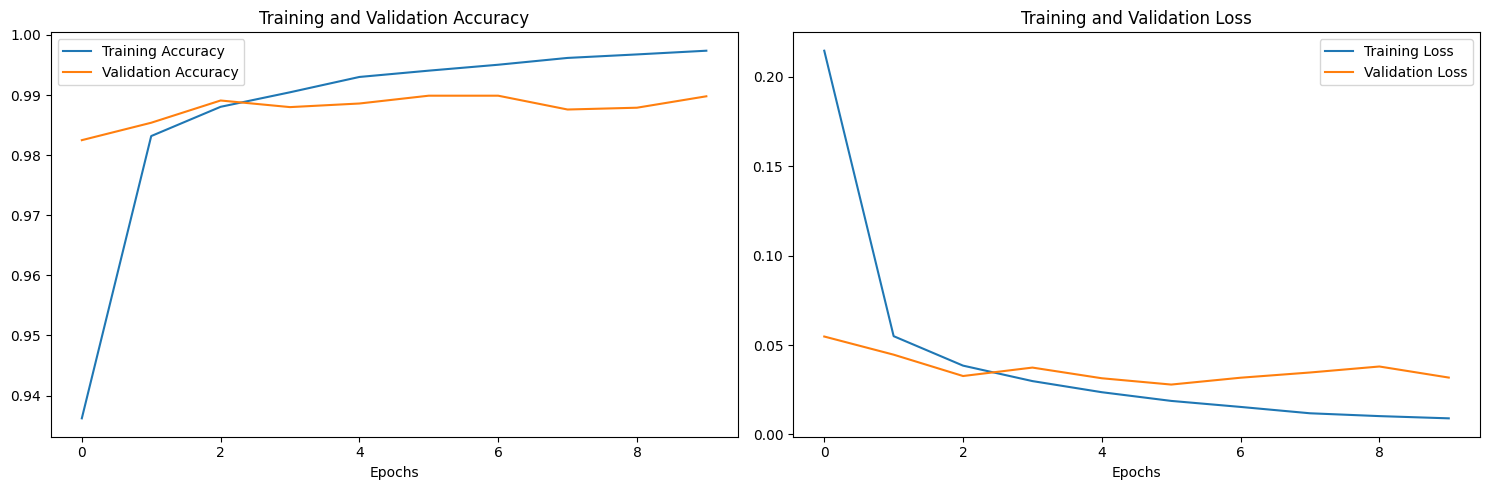

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 載入 MNIST 手寫數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 資料預處理
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 建立 DCNN 模型
model = Sequential([
    # 第一個卷積層，32 個 3x3 濾波器，激活函數為 ReLU
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 最大池化層
    MaxPooling2D(pool_size=(2, 2)),

    # 第二個卷積層，64 個 3x3 濾波器，激活函數為 ReLU
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # 最大池化層
    MaxPooling2D(pool_size=(2, 2)),

    # 展平層，將卷積層的輸出展平成一維向量
    Flatten(),

    # 全連接層，128 個神經元
    Dense(128, activation='relu'),

    # 輸出層，使用 softmax 進行 10 個類別的分類
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

# 繪製訓練過程的準確率與損失變化
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training and Validation Accuracy')
#axes[0].set_ylim(0, 1)
axes[0].legend()

# 第二個子圖 - 訓練的損失變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()
plt.show()


In [7]:
score = model.evaluate(x_test,y_test)
print('loss:',score[0])
print('acc:',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9871 - loss: 0.0400
loss: 0.03178457170724869
acc: 0.989799976348877


In [8]:
import numpy as np

# 假設 model 已經訓練完畢
# 準備測試資料，這裡使用 x_test
x_test_sample = x_test[:5]  # 取測試集中的前 5 筆資料

# 使用 predict 方法進行預測
predictions = model.predict(x_test_sample)

# 列印預測結果 (每一筆資料的機率分布)
print("每個數字的預測機率：")
print(predictions)

# 將機率分布轉換為預測的類別 (使用 argmax 找到機率最大的位置)
predicted_classes = np.argmax(predictions, axis=1)

# 列印預測的類別
print("預測的數字為：", predicted_classes)

# 比較真實標籤與預測結果
actual_classes = np.argmax(y_test[:5], axis=1)  # 真實的數字標籤
print("真實的數字為：", actual_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
每個數字的預測機率：
[[4.2711954e-09 2.7149021e-08 1.0076998e-09 4.8151478e-09 1.8387386e-10
  7.3449719e-12 3.0212964e-15 9.9999976e-01 5.7269103e-11 2.2230701e-07]
 [1.4213887e-06 9.1747976e-10 9.9999857e-01 3.2528705e-14 3.4066684e-12
  1.0196190e-18 3.5847879e-08 2.9571110e-13 4.2683027e-11 1.4338089e-12]
 [1.9654628e-07 9.9999869e-01 1.4027572e-09 4.8708048e-13 3.8085361e-07
  2.7367614e-08 1.1119829e-07 2.3870061e-07 3.7195841e-07 1.3131694e-09]
 [9.9999917e-01 2.8272053e-11 3.2680672e-09 3.2605283e-12 2.1217188e-12
  2.1640314e-13 7.8024215e-07 2.9500360e-10 6.1018764e-12 2.7202174e-09]
 [2.1473726e-11 3.2938741e-09 6.1471001e-10 2.9610506e-10 9.9995315e-01
  6.2194382e-11 3.5867759e-10 6.0927492e-11 1.4928192e-07 4.6760913e-05]]
預測的數字為： [7 2 1 0 4]
真實的數字為： [7 2 1 0 4]
